5/26/2021
1. Check the timestamps of p2c1 and p2c2 (will be fixed by Will)
2. read all 6 cameras (done)
3. read June data with 3 RAV4's

In [ ]:
from utils import *
import importlib
import utils
importlib.reload(utils)
import os.path
from os import path
import pathlib
import pandas as pd
import utils_optimization as opt
importlib.reload(opt)
import time
from scipy.optimize import minimize,NonlinearConstraint,leastsq,fmin_slsqp,least_squares
import numpy.linalg as LA

In [103]:
# read all cameras into one df
import utils
importlib.reload(utils)
data_path = pathlib.Path().absolute().joinpath('../June 2021 Data - 1 minute 5 cameras w RAV 4')
tform_path = pathlib.Path().absolute().joinpath('../2D-3D May 2021/i24-roadway-transforms-main/tform')

# df = pd.DataFrame()
for root,dirs,files in os.walk(str(data_path)):
    for file in files:
        if file.endswith(".csv") and file.startswith("p1c3"):
            file_name = data_path.joinpath(file)
            camera_id = utils.find_camera_name(file)
            print('reading ',camera_id,'...')
            df1 = utils.preprocess(file_name, tform_path)
            df1 = df1.assign(camera=camera_id)
#             df = pd.concat([df, df1])
            
df1 = df1.sort_values(by=['Frame #','Timestamp']).reset_index(drop=True)            
# df = df[df['direction']>0]
xmin,xmax,ymin,ymax = utils.get_xy_minmax(df)


reading  p1c3 ...
Reading data...
182
Transform from image to road...
Get x direction...
Naive filter...
after direction=0 filter:  180
track too short:  5130
track too short:  84120
track too short:  133130
track too short:  134130
track too short:  145130
track too short:  178130
track too short:  392120
track too short:  451130
track too short:  469130
track too short:  479130
track too short:  571120
track too short:  655120
after filtering short tracks:  168
Deleting unrelavent columns...
Interpret missing timestamps...


In [141]:
# read & rectify each camera df individually
import utils
importlib.reload(utils)
data_path = pathlib.Path().absolute().joinpath('../June 2021 Data - 1 minute 5 cameras w RAV 4')
tform_path = pathlib.Path().absolute().joinpath('../2D-3D May 2021/i24-roadway-transforms-main/tform')

# df = pd.DataFrame()
for root,dirs,files in os.walk(str(data_path)):
    for file in files:
        if file.endswith(".csv") and file.startswith("p1c2"):
            
            # ... reading ...
            file_name = data_path.joinpath(file)
            camera_id = utils.find_camera_name(file)
            print('reading ',camera_id,'...')
            
            # ... preprocessing ...
            df1 = utils.preprocess(file_name, tform_path)
            df1 = df1.assign(camera=camera_id)
#             df = pd.concat([df, df1])
            df1 = df1.sort_values(by=['Frame #','Timestamp']).reset_index(drop=True)
        
            # ... rectifying ...
            df = opt.rectify(df1)
            
            # ... post processing ...
            dfpp = utils.post_process(df)
            
            # ... saving ...
            new_name = 'rectified_' + camera_id + '.csv'
            dfpp.to_csv(new_name)
            

reading  p1c2 ...
Reading data...
212
Transform from image to road...
Get x direction...
Naive filter...
after direction=0 filter:  210
track too short:  8120
track too short:  261120
track too short:  293120
track too short:  406120
track too short:  469120
track too short:  514120
track too short:  516120
track too short:  530120
track too short:  539120
track too short:  549120
track too short:  563120
track too short:  590120
track too short:  591120
track too short:  627120
track too short:  666120
track too short:  672120
track too short:  735120
track too short:  867120
track too short:  885120
track too short:  887120
track too short:  911120
after filtering short tracks:  189
Deleting unrelavent columns...
Interpret missing timestamps...


In [115]:
car1 = df[df['ID']==316120]
car2 = df[df['ID']==399120]
car3 = df[df['ID']==655120]
car4 = df[df['ID']==479130]
car5 = df1[df1['ID']==134130]
car6 = df1[df1['ID']==145130]
car7 = dfp[dfp['ID']==82120] # too wide

In [142]:
# rectify all
df = opt.rectify(df1)

In [ ]:
# filter width in post processing
import utils
importlib.reload(utils)
dfpp = utils.post_process(df) # takes a long time for p1c2

In [140]:
dfpp.to_csv('rectified_p1c2.csv')

In [138]:
import importlib
import animation_utils as an
importlib.reload(an)

an.generate_frames(dfpp, xmin=500, xmax = 1200, ymax=120, skip_frame=1)

In [139]:
# Fetch image files from the folder, and create an animation.
importlib.reload(an)
image_folder = '../p1c3'
video_name = '../p1c3.mp4'
an.write_video(image_folder, video_name, fps=30)


In [3]:
rav4 = ['316120','344120','399120']
df = df[df['ID'].isin(rav4)]
df

Frame #     Timestamp      ID Object class Generation method  \
31574      682  1.623878e+09  316120      midsize          Detector   
31637      683  1.623878e+09  316120      midsize          Detector   
31702      684  1.623878e+09  316120      midsize          Detector   
31767      685  1.623878e+09  316120      midsize          Detector   
31834      686  1.623878e+09  316120      midsize          Detector   
...        ...           ...     ...          ...               ...   
68052     1244  1.623878e+09  399120      midsize          Detector   
68131     1245  1.623878e+09  399120      midsize          Detector   
68209     1246  1.623878e+09  399120      midsize          Detector   
68288     1247  1.623878e+09  399120      midsize          Detector   
68366     1248  1.623878e+09  399120      midsize          Detector   

             fbrx        fbry        fblx        fbly        bbrx  ...  \
31574  481.943103   59.449233  413.372214   87.923658  523.973558  ...   
31637  449.006480  135.117408  531.467614  113.346834  421.046074  ...   
31702  455.591760  144.571550  539.091506  122.355112  425.840834  ...   
31767  463.625642  153.194392  546.074004  131.094498  432.733262  ...   
31834  468.818226  163.550724  553.844012  140.576046  441.340920  ...   
...           ...         ...         ...         ...         ...  ...   
68052         NaN         NaN         NaN         NaN         NaN  ...   
68131         NaN         NaN         NaN         NaN         NaN  ...   
68209         NaN         NaN         NaN         NaN         NaN  ...   
68288         NaN         NaN         NaN         NaN         NaN  ...   
68366         NaN         NaN         NaN         NaN         NaN  ...   

            fbr_x     fbr_y       fbl_x     fbl_y       bbr_x     bbr_y  \
31574  118.370801  4.640242  118.611937  7.069806  113.407773  4.637416   
31637  119.276239  4.639320  119.516198  7.075849  114.483203  4.636621   
31702  120.199301  4.625674  120.438895  7.069864  115.133444  4.622839   
31767  121.075187  4.664432  121.308682  7.086896  116.102296  4.661514   
31834  122.016782  4.598994  122.254010  7.049276  117.278591  4.596456   
...           ...       ...         ...       ...         ...       ...   
68052         NaN       NaN         NaN       NaN         NaN       NaN   
68131         NaN       NaN         NaN       NaN         NaN       NaN   
68209         NaN       NaN         NaN       NaN         NaN       NaN   
68288         NaN       NaN         NaN       NaN         NaN       NaN   
68366         NaN       NaN         NaN       NaN         NaN       NaN   

            bbl_x     bbl_y  direction  camera  
31574  114.659338  7.197025        1.0    p1c2  
31637  115.739547  7.205135        1.0    p1c2  
31702  116.466355  7.209842        1.0    p1c2  
31767  117.236445  7.203731        1.0    p1c2  
31834  118.688343  7.202146        1.0    p1c2  
...           ...       ...        ...     ...  
68052         NaN       NaN        1.0    p1c6  
68131         NaN       NaN        1.0    p1c6  
68209         NaN       NaN        1.0    p1c6  
68288         NaN       NaN        1.0    p1c6  
68366         NaN       NaN        1.0    p1c6  

[2255 rows x 31 columns]

478  unique cars
822
ID: 316120 # frames: 822 # cameras: 5


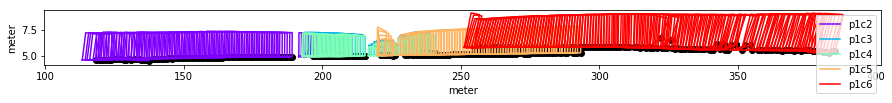

737
ID: 344120 # frames: 737 # cameras: 5


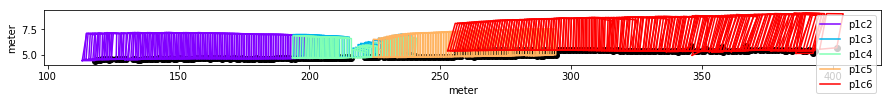

696
ID: 399120 # frames: 696 # cameras: 5


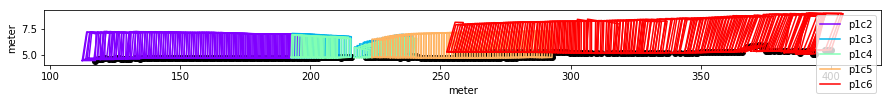

In [32]:

from matplotlib import cm
camera_list = ['p1c2','p1c3','p1c4','p1c5','p1c6']
color=cm.rainbow(np.linspace(0,1,len(camera_list)))
camera_dict = dict(zip(camera_list,color))

groups = df.groupby('ID')
groupList = list(groups.groups)
nO = len(groupList) # number of cars to test
print(nO,' unique cars')


for i in range(nO):
    ID = groupList[i]
    if str(int(ID)) not in rav4:
        continue
    Y1 = groups.get_group(ID)
    print(len(Y1))
    camera_group = Y1.groupby('camera')
    print('ID:',ID,'# frames:',len(Y1),'# cameras:',len(camera_group))
    fig, ax = plt.subplots(figsize=(15,1))
    
    for cameraID,cg in camera_group:
        Y = np.array(cg[['bbr_x','bbr_y', 'fbr_x','fbr_y','fbl_x','fbl_y','bbl_x', 'bbl_y']])
        c=camera_dict[cameraID]
        for i in range(len(Y)):
            coord = Y[i,:]
            coord = np.reshape(coord,(-1,2)).tolist()
            coord.append(coord[0]) #repeat the first point to create a 'closed loop'
            xs, ys = zip(*coord) #lon, lat as x, y   
            plt.plot(xs,ys,c=c,label=cameraID if i == 0 else "")

        plt.scatter(Y[:,2],Y[:,3],color='black')
        ax = plt.gca()
        plt.xlabel('meter')
        plt.ylabel('meter')
        ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
#     plt.xlim([xmin,xmax])
#     plt.ylim([ymin,ymax])   
    plt.legend()
    plt.show()

In [33]:
# select only one measurement from mutliple cameras per frame per ID
df = utils.preprocess_multi_camera(df)

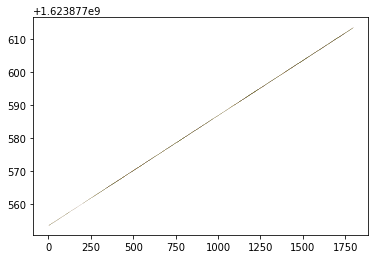

In [9]:
# to interpret missing timestamps
z = np.polyfit(df['Frame #'].iloc[[0,-1]].values,df['Timestamp'].iloc[[0,-1]].values, 1)
p = np.poly1d(z)
plt.scatter(df['Frame #'],df['Timestamp'],s=0.00001)
plt.scatter(df['Frame #'],p(df['Frame #']),s=0.00001)

In [10]:
p

poly1d([3.34336677e-02, 1.62387755e+09])

In [36]:
df.to_csv('rectified_all.csv')

In [186]:
# try rectify on individual cameras

import utils_optimization as opt
importlib.reload(opt)
import utils
importlib.reload(utils)

output_path = data_path.joinpath('rectified')

camera_groups = df.groupby('camera')
for camera_id, cg in camera_groups:
    if (camera_id=='p1c5') or (camera_id=='p1c6'):
        print(camera_id)
        cg_new = opt.rectify(cg,p)
        new_name = 'rectified_'+ camera_id+'.csv'
        new_path = output_path.joinpath(new_name)
        cg_new.to_csv(new_path)
    

p1c5
2120
2150
3150
4120
7150
9150
14120
15150
21150
26120
29120
30120
30150
37150
40120
47120
47150
48150
52150
63150
64150
76150
78120
79120
80120
82120
84120
track too short
84150
86120
93150
99150
100150
101120
107150
109150
119150
124150
128120
134120
139150
140120
track too short
142150
151120
154120
155150
156120
163150
164120
172120
172150
track too short
176120
177150
186150
187150
192120
199150
200150
203150
209150
216150
217150
227150
230150
232120
234120
234150
240120
241150
249150
250150
256150
258120
263120
267120
278150
279120
279150
283150
284120
286150
294120
294150
298150
314150
316120
316150
325120
326120
333150
336150
337150
344120
345120
351150
354150
360150
362150
366150
367150
373150
374150
375150
378120
381150
393120
393150
399120
402120
409120
413150
track too short
417120
417150
425150
446150
453150
461120
472120
476150
479150
481120
482120
483150
486150
490120
490150
491150
492150
497120
502120
503120
504120
506120
510150
513150
515120
521120
522120
529120
53

In [191]:
car = cg_new[cg_new['ID']==601120]
len(car)

130

In [223]:
import utils_optimization as opt
importlib.reload(opt)
import utils
importlib.reload(utils)

data_path = pathlib.Path().absolute().joinpath('../June 2021 Data - 1 minute 5 cameras w RAV 4/rectified/old')

for root,dirs,files in os.walk(str(data_path)):
    for file in files:
        if file.endswith(".csv"):
            file_name = data_path.joinpath(file)
            camera_name = utils.find_camera_name(file)
            print(file)
            df = utils.read_data(file_name)
            df = utils.post_process(df)
            df.to_csv('rectified_'+camera_name+'_post2.csv')

rectified_p1c2.csv
rectified_p1c3.csv
rectified_p1c4.csv
rectified_p1c5.csv
rectified_p1c6.csv


76 unique cars
ID: 22261 Valid/total timestamps: 119 / 51 runtime: 1.8938663005828857 
 width: 1.855302299942494 length: 4.25823156057276 score: 80.2420245564155
ID: 22261 Valid/total timestamps: 40 / 38 runtime: 1.4531946182250977 
 width: 1.669518956712721 length: 4.307499675498517 score: 1.2332521151532658


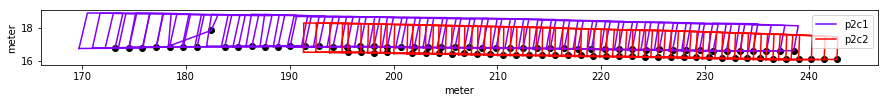

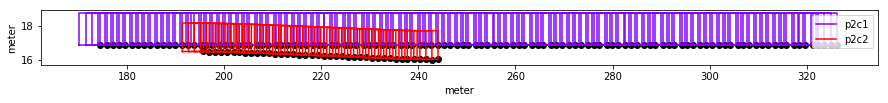

ID: 24261 Valid/total timestamps: 142 / 52 runtime: 4.564901113510132 
 width: 1.9961069011172126 length: 4.136250844692763 score: 5.468531398781442
ID: 24261 Valid/total timestamps: 51 / 46 runtime: 1.24989914894104 
 width: 1.8211807326427785 length: 4.2192943444283815 score: 2.379611197015915


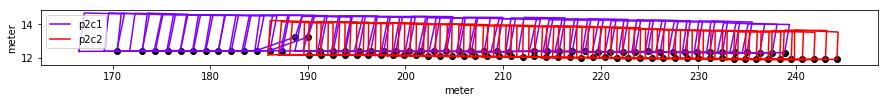

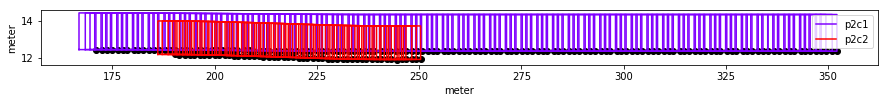

ID: 30261 Valid/total timestamps: 66 / 66 runtime: 0.5899057388305664 
 width: 2.170985731959202 length: 2.923257857433604 score: 11.87637525542764
ID: 30261 Valid/total timestamps: 117 / 47 runtime: 4.624990940093994 
 width: 1.8080362587587364 length: 3.5061857865245263 score: 2.7503910337312045


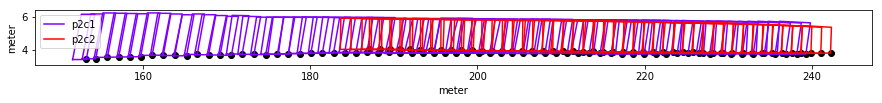

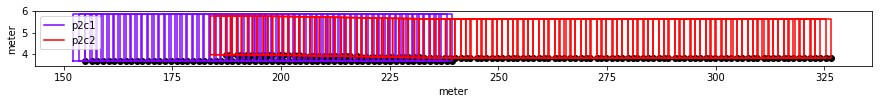

ID: 37261 Valid/total timestamps: 116 / 91 runtime: 4.917450428009033 
 width: 2.076137465501817 length: 3.817211091050915 score: 9.726757338516414
ID: 37261 Valid/total timestamps: 133 / 56 runtime: 2.269437313079834 
 width: 1.7680743462799324 length: 4.00147782513014 score: 19.194943649195


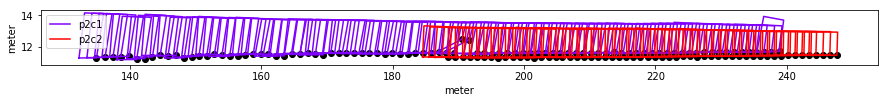

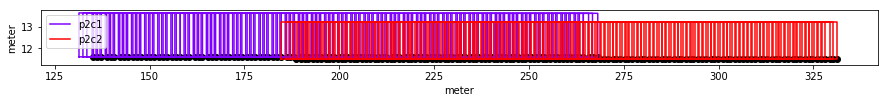

ID: 39261 Valid/total timestamps: 113 / 70 runtime: 1.2959704399108887 
 width: 2.0795028701134437 length: 4.19010920348619 score: 152.77722747915925
ID: 39261 Valid/total timestamps: 136 / 45 runtime: 4.7611985206604 
 width: 1.8023070712162774 length: 4.143214305551929 score: 2.3799076929776826


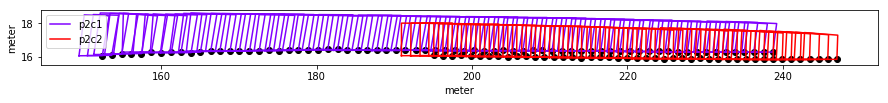

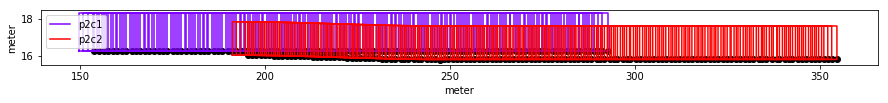

ID: 49261 Valid/total timestamps: 143 / 81 runtime: 5.235917806625366 
 width: 2.0507739643296685 length: 3.208662132163586 score: 9.241769619025495
ID: 49261 Valid/total timestamps: 114 / 50 runtime: 3.6905887126922607 
 width: 1.733016235027073 length: 3.5457682039023375 score: 1.9615593067881387


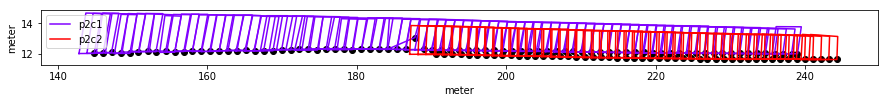

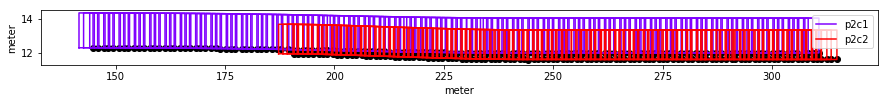

ID: 56261 Valid/total timestamps: 100 / 71 runtime: 1.194807529449463 
 width: 2.0738967941770707 length: 3.9860002540312323 score: 18.361411308981122
ID: 56261 Valid/total timestamps: 75 / 58 runtime: 2.9955296516418457 
 width: 1.8216638225850728 length: 4.057793392795478 score: 3.00863994308813


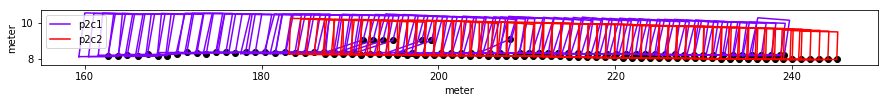

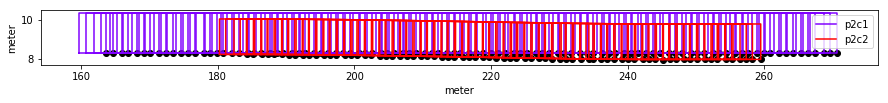

ID: 63261 Valid/total timestamps: 142 / 91 runtime: 4.7581939697265625 
 width: 2.1985453457110924 length: 3.2123935981847676 score: 11.480935794740006
ID: 63261 Valid/total timestamps: 60 / 54 runtime: 1.8357758522033691 
 width: 1.7742792764608664 length: 3.737175016905508 score: 2.4952128955251154


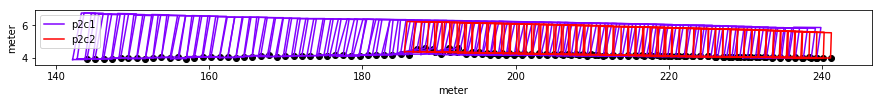

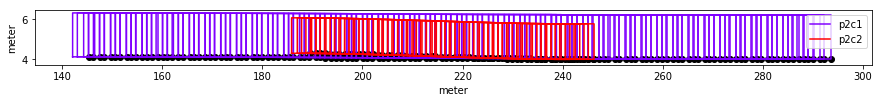

ID: 69261 Valid/total timestamps: 130 / 81 runtime: 4.463745594024658 
 width: 2.2033375061971894 length: 4.4279151155048275 score: 9.734742925925724
ID: 69261 Valid/total timestamps: 74 / 57 runtime: 2.1021792888641357 
 width: 1.8512478116143425 length: 4.298252686427802 score: 2.2727316795040164


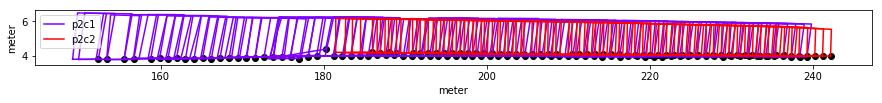

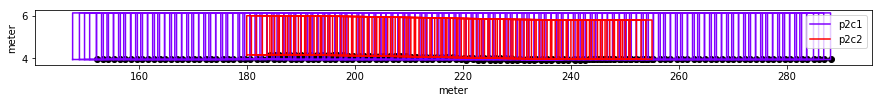

ID: 70261 Valid/total timestamps: 135 / 77 runtime: 4.82028865814209 
 width: 1.9892420934404587 length: 3.631006995015263 score: 9.077297173794323
ID: 70261 Valid/total timestamps: 117 / 43 runtime: 4.177316427230835 
 width: 1.6182547612838747 length: 4.050006242570189 score: 2.305005448892739


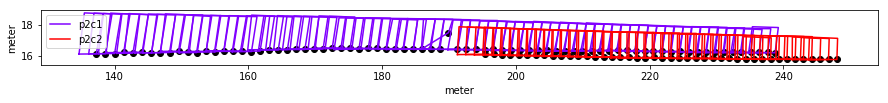

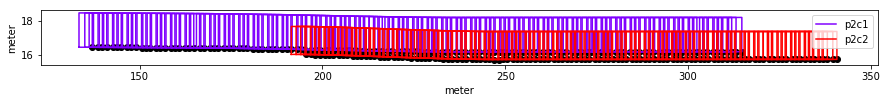

ID: 73261 Valid/total timestamps: 153 / 82 runtime: 4.944486856460571 
 width: 2.2461144063602445 length: 4.493053233511466 score: 8.228933646283483
ID: 73261 Valid/total timestamps: 79 / 61 runtime: 1.6875653266906738 
 width: 2.0012753437060393 length: 4.607637365909909 score: 2.0799556534776213


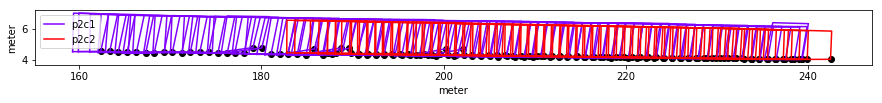

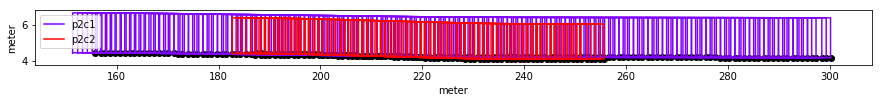

ID: 76261 Valid/total timestamps: 170 / 149 runtime: 5.2299113273620605 
 width: 3.1323653674429606 length: 18.261134098470738 score: 52.47505598898927
ID: 76261 Valid/total timestamps: 74 / 52 runtime: 1.0065360069274902 
 width: 2.7222744318438306 length: 20.207134955532165 score: 18.447193023434203


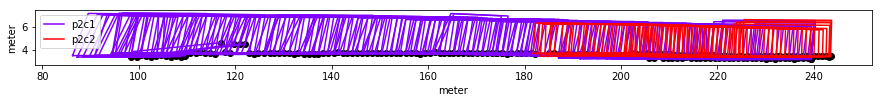

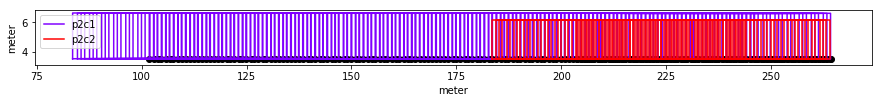

ID: 78261 Valid/total timestamps: 157 / 96 runtime: 2.936450719833374 
 width: 2.207095702417653 length: 3.4436236280035217 score: 13.14197055280559
ID: 78261 Valid/total timestamps: 131 / 52 runtime: 2.139249086380005 
 width: 1.7531835517360206 length: 3.740422375770024 score: 55.56288834969909


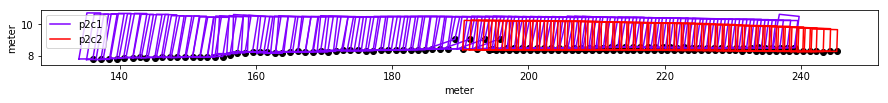

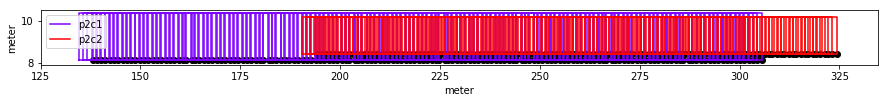

ID: 80261 Valid/total timestamps: 148 / 81 runtime: 2.6700515747070312 
 width: 1.9912268867201304 length: 3.16354041777937 score: 21.083995534606455
ID: 80261 Valid/total timestamps: 94 / 47 runtime: 2.4346840381622314 
 width: 1.592983453656027 length: 4.128594037796704 score: 2.554437467027598


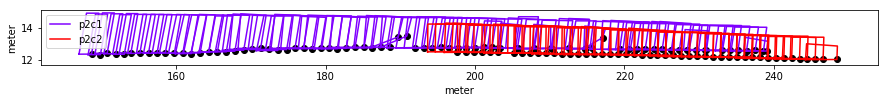

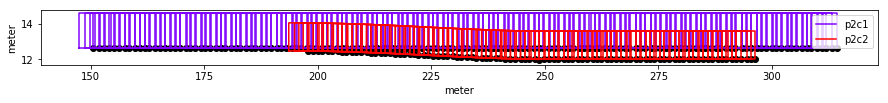

ID: 83261 Valid/total timestamps: 84 / 81 runtime: 0.9244017601013184 
 width: 2.096293344840503 length: 3.6969680258300968 score: 19.225982792354515
ID: 83261 Valid/total timestamps: 121 / 44 runtime: 4.473769426345825 
 width: 1.6261473248405076 length: 4.405062286982659 score: 2.1156922733755983


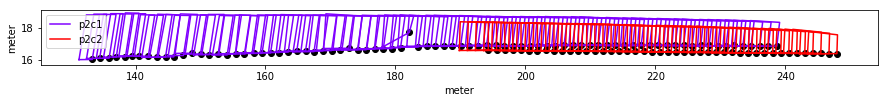

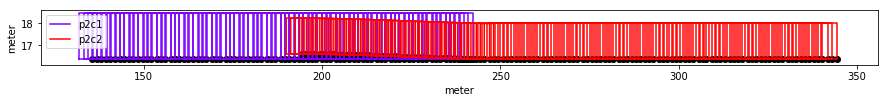

ID: 86261 Valid/total timestamps: 192 / 171 runtime: 3.2078497409820557 
 width: 3.991303437915638 length: 20.614318401533477 score: 67.19472411946086
ID: 86261 Valid/total timestamps: 67 / 59 runtime: 3.1507668495178223 
 width: 2.7830458040268677 length: 19.59539747976054 score: 20.46909393036325


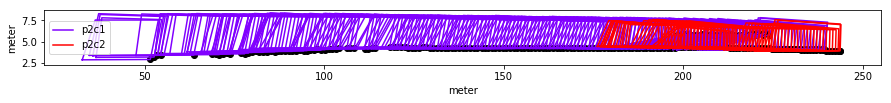

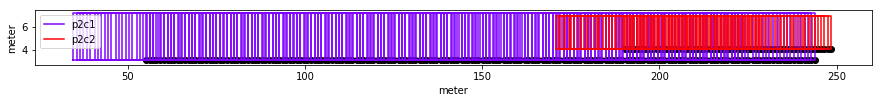

ID: 87261 Valid/total timestamps: 86 / 17 runtime: 1.020540714263916 
 width: 1.9968313195077076 length: 4.288621177235979 score: 618.3445950492205
ID: 87261 Valid/total timestamps: 60 / 20 runtime: 0.6089227199554443 
 width: 2.3063361523570336 length: 4.478345533494844 score: 92.27558433787523


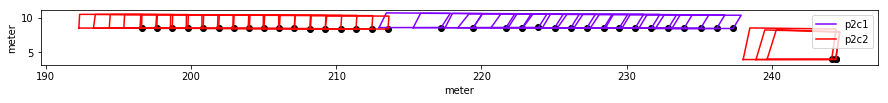

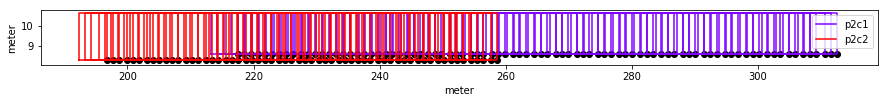

ID: 88221 Valid/total timestamps: 3 / 3 runtime: 0.029043912887573242 
 width: 1.0 length: 2.0 score: 3.3973139935294894


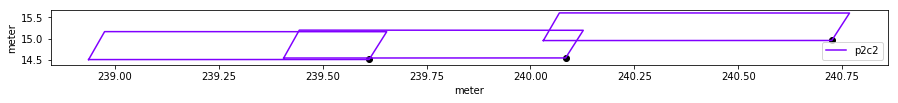

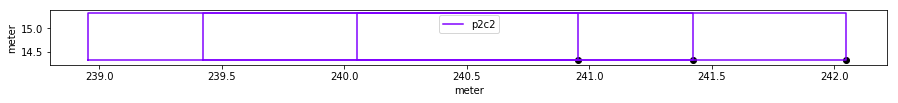

ID: 89261 Valid/total timestamps: 160 / 157 runtime: 2.5198118686676025 
 width: 3.1327806804737137 length: 11.980441121494179 score: 41.80434555566326
ID: 89261 Valid/total timestamps: 61 / 52 runtime: 3.6755549907684326 
 width: 2.465154848315624 length: 10.710361429350051 score: 4.018431249162541


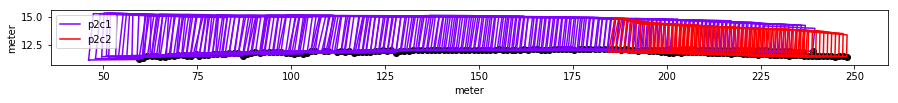

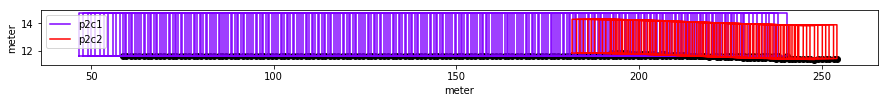

ID: 93261 Valid/total timestamps: 162 / 93 runtime: 2.449718475341797 
 width: 2.4802788288554187 length: 4.7276252318875915 score: 22.393965646371658
ID: 93261 Valid/total timestamps: 58 / 51 runtime: 1.5042896270751953 
 width: 2.0022131900832307 length: 5.1477144746278825 score: 2.4641732347003105


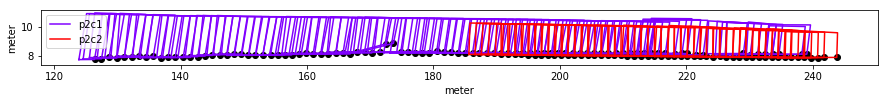

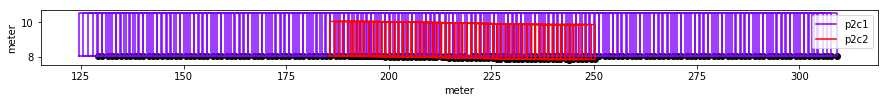

ID: 96261 Valid/total timestamps: 72 / 66 runtime: 0.673018217086792 
 width: 2.334973899177776 length: 2.1974090824807986 score: 23.030322724158015
ID: 96261 Valid/total timestamps: 99 / 57 runtime: 3.612464427947998 
 width: 1.5872287717657017 length: 3.654797806581425 score: 2.8303417027195414


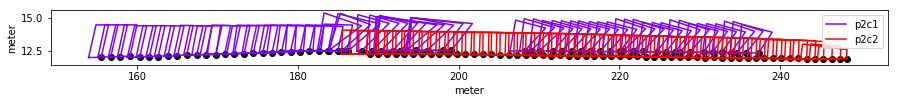

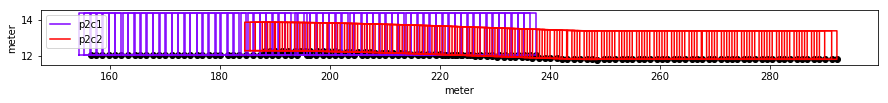

ID: 98261 Valid/total timestamps: 127 / 70 runtime: 1.8297669887542725 
 width: 2.1604870417037363 length: 3.9337101289602887 score: 17.27481940159228
ID: 98261 Valid/total timestamps: 101 / 51 runtime: 3.876863718032837 
 width: 1.8287229889914542 length: 4.254138907130209 score: 2.487489957995071


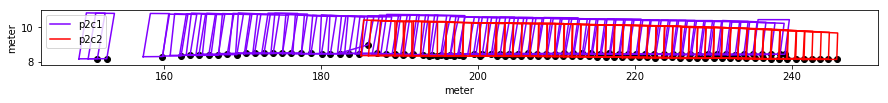

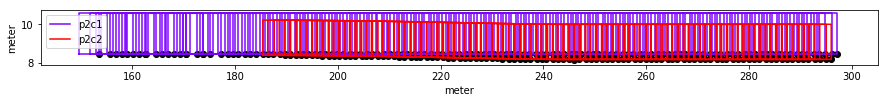

ID: 100261 Valid/total timestamps: 79 / 66 runtime: 3.017564296722412 
 width: 2.2776399362551736 length: 4.166333760416257 score: 15.766655816462102
ID: 100261 Valid/total timestamps: 97 / 54 runtime: 2.9444663524627686 
 width: 1.9387360358992207 length: 4.759119713576684 score: 2.446778298764718


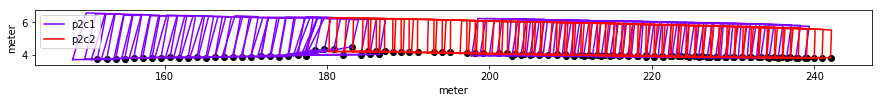

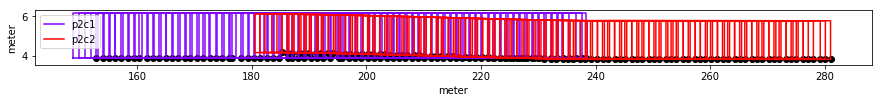

ID: 102261 Valid/total timestamps: 138 / 62 runtime: 2.027078866958618 
 width: 2.1128417218566016 length: 4.946830348636929 score: 86.9898498612401
ID: 102261 Valid/total timestamps: 88 / 43 runtime: 1.055596113204956 
 width: 1.9046878209599747 length: 4.997163215562547 score: 37.60912032078247


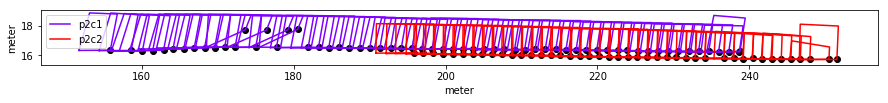

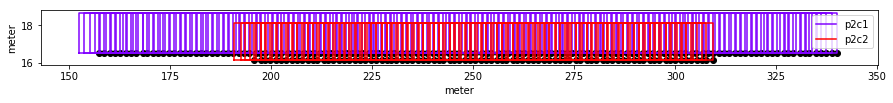

ID: 105261 Valid/total timestamps: 119 / 70 runtime: 1.8628199100494385 
 width: 2.002537318781461 length: 3.9369625597978857 score: 36.64544900929616
ID: 105261 Valid/total timestamps: 122 / 47 runtime: 5.051643371582031 
 width: 1.696637155575329 length: 4.207200866245369 score: 4.181928114435125


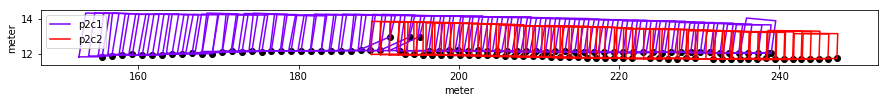

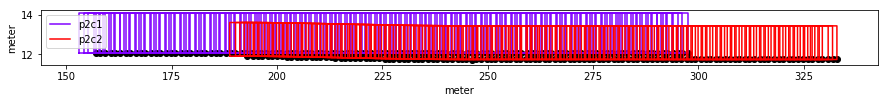

ID: 109261 Valid/total timestamps: 134 / 91 runtime: 4.825290203094482 
 width: 2.282990981468558 length: 3.3346003508360607 score: 18.422050562237217
ID: 109261 Valid/total timestamps: 130 / 56 runtime: 3.755681276321411 
 width: 1.857266898863656 length: 3.7227773912694007 score: 3.7421905792508525


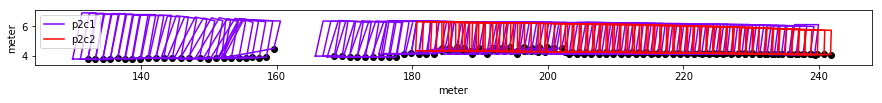

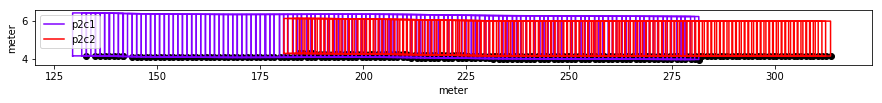

ID: 118261 Valid/total timestamps: 152 / 107 runtime: 4.938480377197266 
 width: 2.43845714729114 length: 4.180313070542819 score: 16.399886550289743
ID: 118261 Valid/total timestamps: 93 / 53 runtime: 2.7551660537719727 
 width: 2.007739581036001 length: 4.626484763915859 score: 2.791458632535691


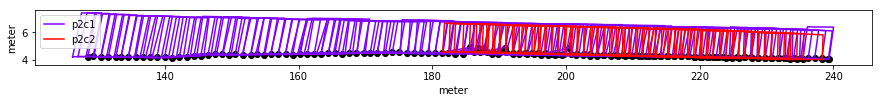

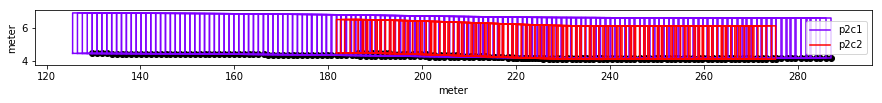

ID: 120261 Valid/total timestamps: 119 / 59 runtime: 2.037081241607666 
 width: 2.011634607913412 length: 3.6163374801523496 score: 53.12856989987398
ID: 120261 Valid/total timestamps: 135 / 52 runtime: 1.7516629695892334 
 width: 1.7547336888633471 length: 3.691787015410923 score: 29.70600865380445


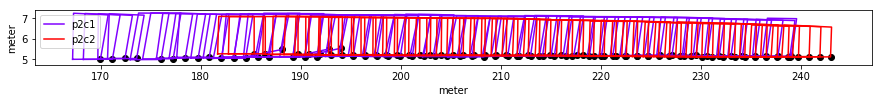

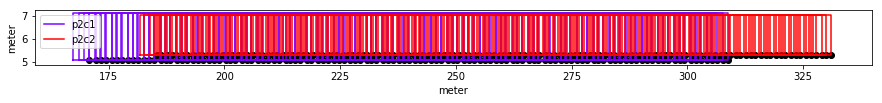

ID: 123261 Valid/total timestamps: 81 / 47 runtime: 0.9244000911712646 
 width: 2.0899549637182515 length: 4.091639113905223 score: 67.95995685970665
ID: 123261 Valid/total timestamps: 48 / 43 runtime: 1.17677640914917 
 width: 1.8561720909644654 length: 4.121043187358739 score: 2.092380054329843


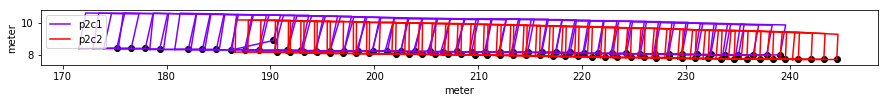

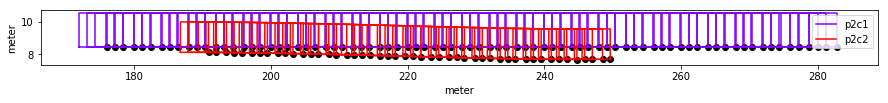

ID: 124261 Valid/total timestamps: 122 / 70 runtime: 1.6785259246826172 
 width: 1.889207112092588 length: 3.942996146353529 score: 61.5969142899334
ID: 124261 Valid/total timestamps: 109 / 46 runtime: 3.650533676147461 
 width: 1.6721809263193177 length: 4.190149540632703 score: 2.1102671942793196


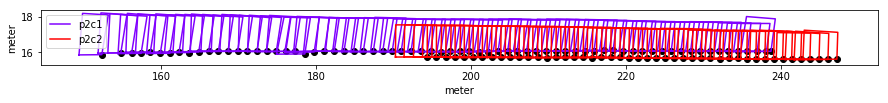

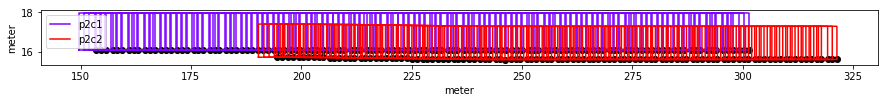

ID: 129261 Valid/total timestamps: 106 / 69 runtime: 3.713629961013794 
 width: 2.002379282539283 length: 3.2095944411329467 score: 8.5573035199033
ID: 129261 Valid/total timestamps: 151 / 46 runtime: 4.510822772979736 
 width: 1.7106530209030641 length: 3.722149792665867 score: 1.8514068333642195


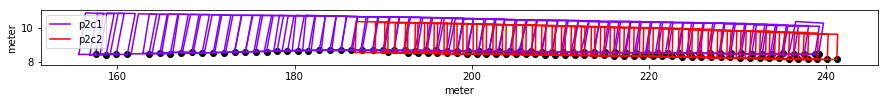

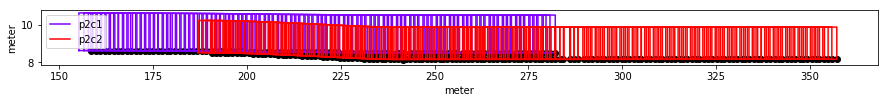

ID: 130261 Valid/total timestamps: 131 / 82 runtime: 4.313522815704346 
 width: 2.252554922598978 length: 4.104956267980705 score: 9.193545484537724
ID: 130261 Valid/total timestamps: 79 / 57 runtime: 2.714107036590576 
 width: 1.965507015366488 length: 3.9052342099965704 score: 2.38644897120151


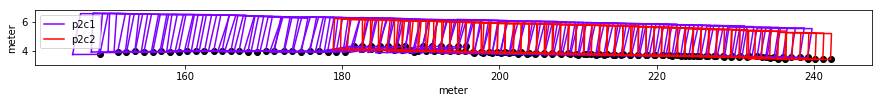

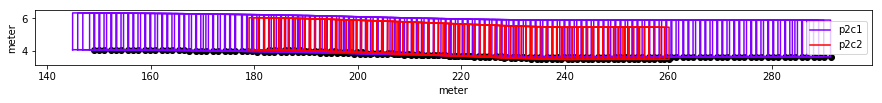

ID: 136261 Valid/total timestamps: 131 / 86 runtime: 1.6384878158569336 
 width: 2.1328789829795607 length: 4.061542933224077 score: 14.863562645781363
ID: 136261 Valid/total timestamps: 60 / 45 runtime: 1.6184470653533936 
 width: 1.7067714174675972 length: 4.901739800075299 score: 8.50520997478833


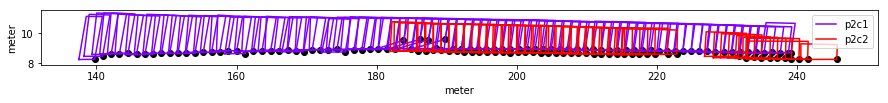

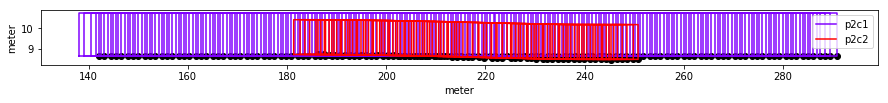

ID: 138261 Valid/total timestamps: 127 / 86 runtime: 5.368131160736084 
 width: 2.247500004147468 length: 3.2588213764889584 score: 11.017768458036914
ID: 138261 Valid/total timestamps: 116 / 52 runtime: 4.296497106552124 
 width: 1.7813271379778828 length: 3.8974752202965224 score: 2.403224245410532


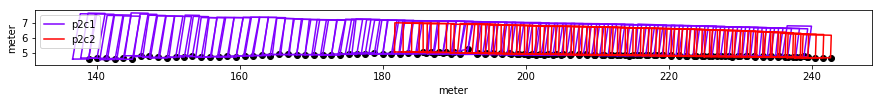

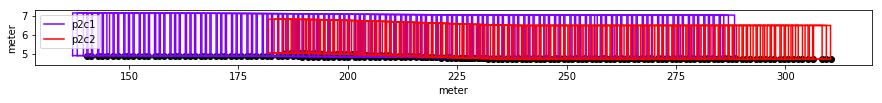

ID: 139261 Valid/total timestamps: 81 / 70 runtime: 1.1247141361236572 
 width: 2.2647557205801525 length: 6.276944937718326 score: 208.24801493469113
ID: 139261 Valid/total timestamps: 109 / 41 runtime: 1.625472068786621 
 width: 2.0012136187185225 length: 5.831277605395702 score: 13.35741100882801


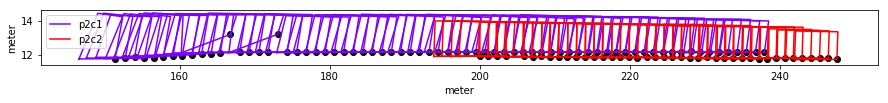

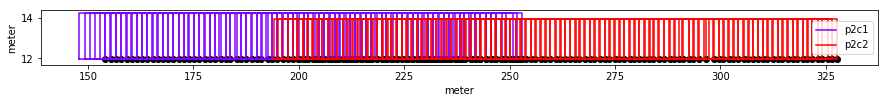

ID: 143261 Valid/total timestamps: 156 / 88 runtime: 4.875370025634766 
 width: 2.3015409584313606 length: 5.749529571042516 score: 9.008989617510034
ID: 143261 Valid/total timestamps: 59 / 54 runtime: 1.4031214714050293 
 width: 2.0431632319723843 length: 5.391247771444412 score: 2.419418677551257


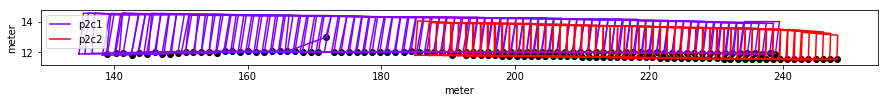

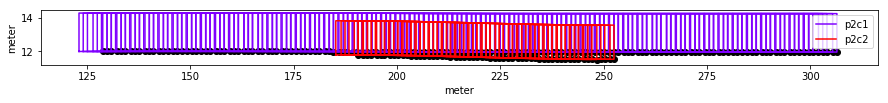

ID: 147261 Valid/total timestamps: 110 / 86 runtime: 3.908909559249878 
 width: 2.103254703822346 length: 4.312944785929344 score: 8.910973301861155
ID: 147261 Valid/total timestamps: 72 / 51 runtime: 2.119206190109253 
 width: 1.8726702105414306 length: 4.3940144551252835 score: 2.1457461517160223


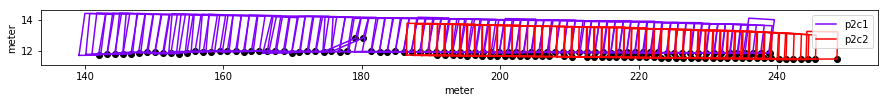

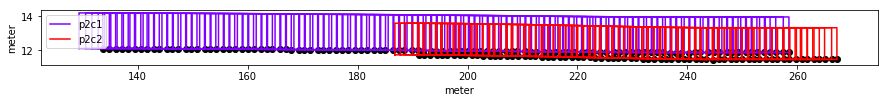

ID: 148261 Valid/total timestamps: 157 / 92 runtime: 4.942488193511963 
 width: 2.2044277613636285 length: 4.305622471728851 score: 14.214623025008772
ID: 148261 Valid/total timestamps: 54 / 46 runtime: 1.2038164138793945 
 width: 1.8393588850672409 length: 5.149614295441986 score: 2.4647630764826576


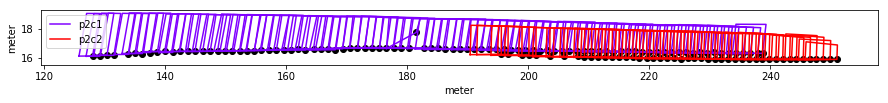

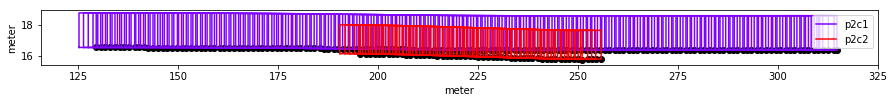

ID: 150261 Valid/total timestamps: 89 / 71 runtime: 3.4131624698638916 
 width: 1.994888744725672 length: 4.57664561732319 score: 7.767449229105585
ID: 150261 Valid/total timestamps: 58 / 53 runtime: 2.0470924377441406 
 width: 1.7962314046324632 length: 4.729171060659132 score: 2.476694048497588


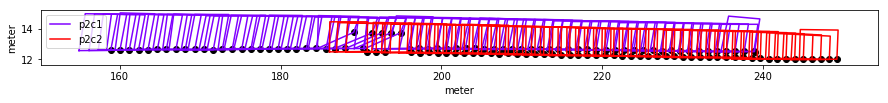

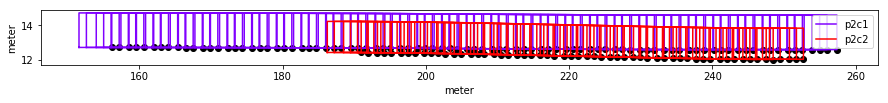

ID: 155261 Valid/total timestamps: 123 / 77 runtime: 1.8417816162109375 
 width: 2.188301026273049 length: 4.184136232341789 score: 125.67440759755465
ID: 155261 Valid/total timestamps: 72 / 43 runtime: 2.359572410583496 
 width: 1.8148391681924212 length: 4.285498711034267 score: 2.244234898896256


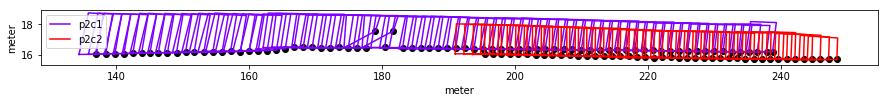

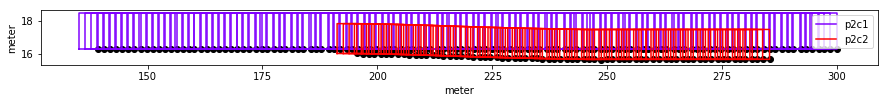

ID: 156261 Valid/total timestamps: 182 / 110 runtime: 5.759709596633911 
 width: 3.175431100237393 length: 23.873396530437674 score: 43.216867838676215
ID: 156261 Valid/total timestamps: 45 / 44 runtime: 2.491767644882202 
 width: 2.62958887769558 length: 22.015034746818014 score: 4.235772412087916


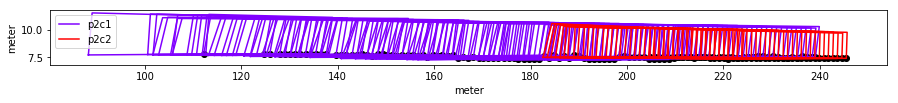

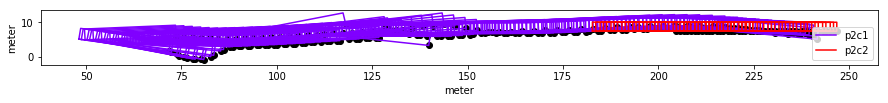

ID: 157261 Valid/total timestamps: 116 / 84 runtime: 4.119230508804321 
 width: 2.218629511286663 length: 4.473792814634503 score: 12.069287560552759
ID: 157261 Valid/total timestamps: 84 / 52 runtime: 1.6394810676574707 
 width: 1.8970358808342704 length: 4.691386591094138 score: 2.151031495666108


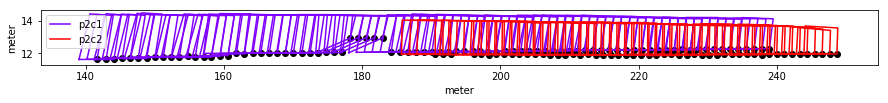

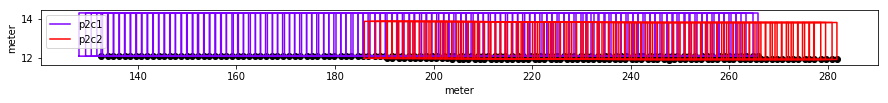

ID: 158261 Valid/total timestamps: 107 / 75 runtime: 3.63751482963562 
 width: 2.1171259513334797 length: 4.173051170580759 score: 12.317064198970654
ID: 158261 Valid/total timestamps: 45 / 42 runtime: 1.2448828220367432 
 width: 1.7467239640403176 length: 4.546982722427958 score: 1.4913136985873632


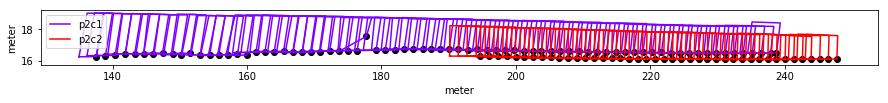

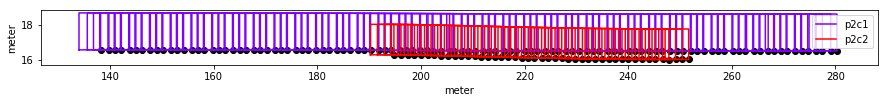

ID: 159261 Valid/total timestamps: 146 / 73 runtime: 2.251406192779541 
 width: 2.0985498764140607 length: 4.233053021423631 score: 206.57130620664938
ID: 159261 Valid/total timestamps: 93 / 47 runtime: 3.974008798599243 
 width: 1.8089599819509572 length: 4.234035909566732 score: 2.227964083179371


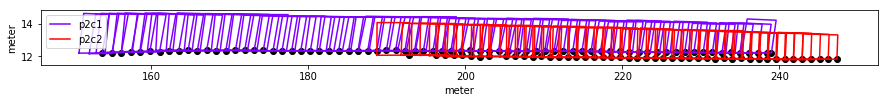

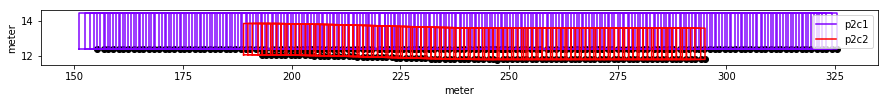

ID: 161261 Valid/total timestamps: 115 / 89 runtime: 4.267455101013184 
 width: 2.6522513406033124 length: 7.619122536934356 score: 14.347836144151357
ID: 161261 Valid/total timestamps: 105 / 55 runtime: 3.907911539077759 
 width: 2.2702718508790625 length: 6.746537577010929 score: 4.684677126852055


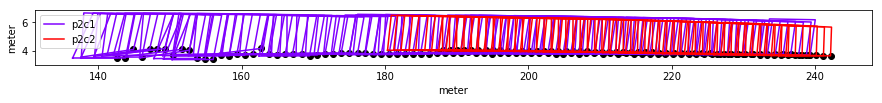

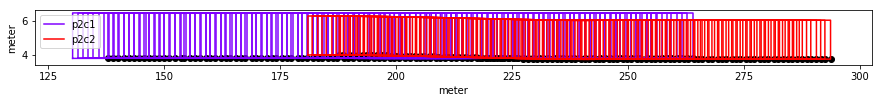

ID: 165261 Valid/total timestamps: 188 / 148 runtime: 5.631516218185425 
 width: 3.260528439130815 length: 23.065873786936905 score: 25.235086919255806
ID: 165261 Valid/total timestamps: 69 / 48 runtime: 0.7461433410644531 
 width: 2.8142755983299463 length: 21.480812085063196 score: 31.140440623722647


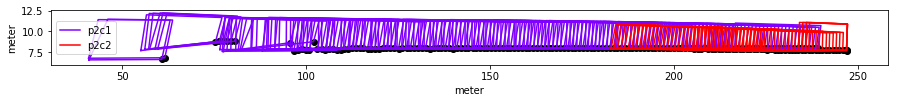

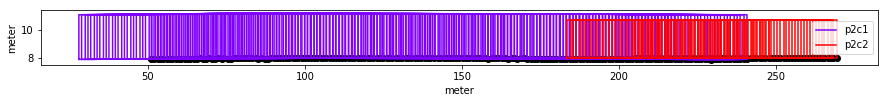

ID: 167261 Valid/total timestamps: 88 / 88 runtime: 2.7191128730773926 
 width: 2.086395627066551 length: 3.2882135423435788 score: 13.29884562297589
ID: 167261 Valid/total timestamps: 157 / 50 runtime: 4.9645068645477295 
 width: 1.6881880674021226 length: 4.2904045695513755 score: 2.420033556171767


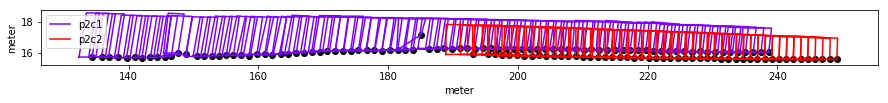

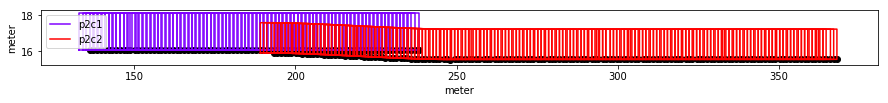

ID: 172261 Valid/total timestamps: 183 / 122 runtime: 5.4442298412323 
 width: 2.4389553892534637 length: 2.960418993829671 score: 14.504518791023157
ID: 172261 Valid/total timestamps: 130 / 57 runtime: 4.4086668491363525 
 width: 1.822358041336596 length: 3.7048677059625974 score: 3.891938025229218


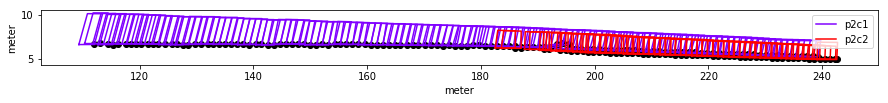

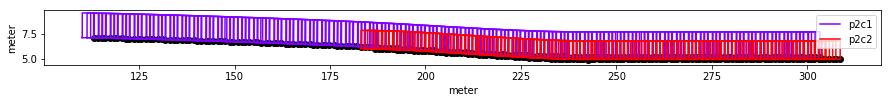

ID: 175261 Valid/total timestamps: 188 / 104 runtime: 4.238423585891724 
 width: 2.4436651631705955 length: 3.3966563430039027 score: 29.829101443604376
ID: 175261 Valid/total timestamps: 129 / 49 runtime: 4.443720102310181 
 width: 1.6268423080026253 length: 4.578853676987211 score: 1.3456549474558988


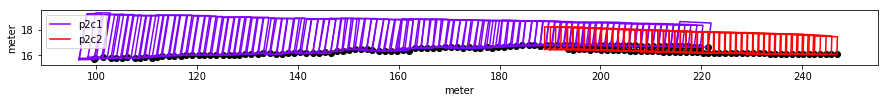

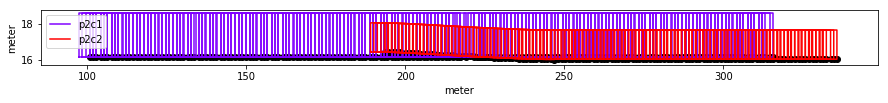

ID: 176261 Valid/total timestamps: 93 / 77 runtime: 3.665534496307373 
 width: 2.4020018870230233 length: 5.0785660546231215 score: 13.773555978400198
ID: 176261 Valid/total timestamps: 62 / 58 runtime: 1.5192971229553223 
 width: 2.0218636010769955 length: 5.0012319715001015 score: 2.5582642494938264


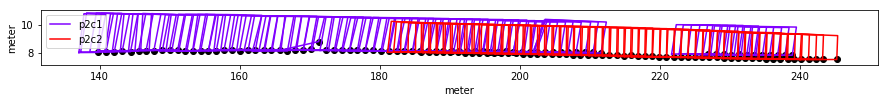

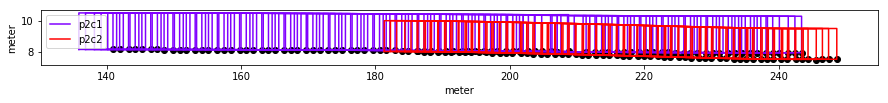

ID: 181261 Valid/total timestamps: 124 / 67 runtime: 4.198362112045288 
 width: 2.2035653380991853 length: 4.78778181938002 score: 11.891604652034582
ID: 181261 Valid/total timestamps: 52 / 48 runtime: 1.8117520809173584 
 width: 1.9021754998972935 length: 5.098231263214761 score: 2.7537913893873065


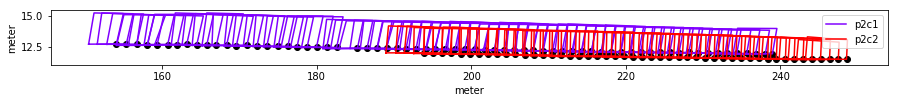

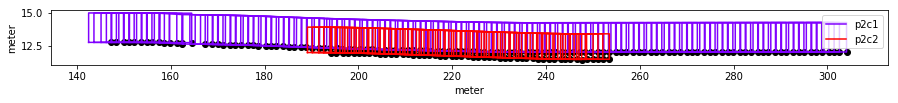

ID: 184261 Valid/total timestamps: 95 / 48 runtime: 1.2368700504302979 
 width: 2.0051861284084977 length: 3.750986524896866 score: 25.524055391765256
ID: 184261 Valid/total timestamps: 58 / 53 runtime: 1.7176108360290527 
 width: 1.7805398459430504 length: 3.6273106719895947 score: 2.4964174314267273


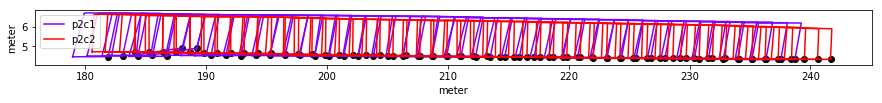

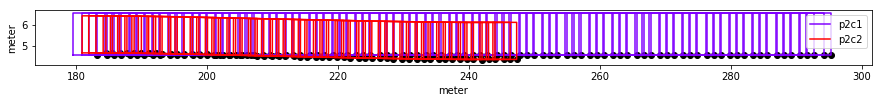

ID: 187261 Valid/total timestamps: 67 / 63 runtime: 2.440690279006958 
 width: 2.3608897314889186 length: 7.152907494681843 score: 6.160862632602092
ID: 187261 Valid/total timestamps: 105 / 47 runtime: 3.898894786834717 
 width: 2.168755722805798 length: 7.13556231683156 score: 3.622595760824263


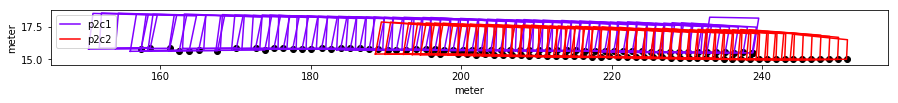

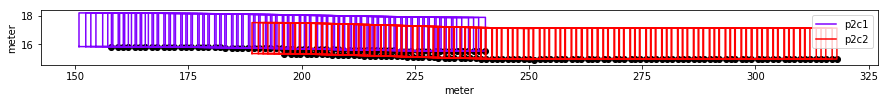

ID: 193261 Valid/total timestamps: 66 / 66 runtime: 0.6850357055664062 
 width: 2.0283812622315023 length: 3.2102383943632673 score: 12.070682806378906
ID: 193261 Valid/total timestamps: 82 / 46 runtime: 3.1717960834503174 
 width: 1.5426258102242494 length: 3.7676395866011188 score: 8.310958061066362


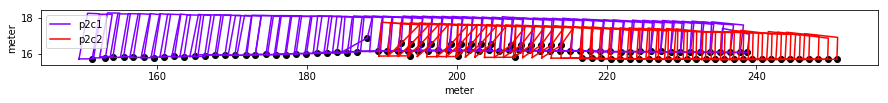

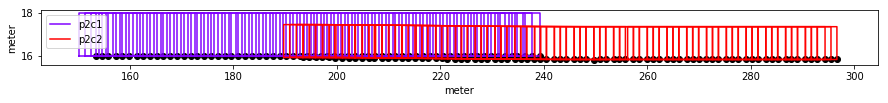

ID: 197221 Valid/total timestamps: 88 / 78 runtime: 3.6925837993621826 
 width: 2.220406175587935 length: 5.3282379951631835 score: 9.595184237697902
ID: 197221 Valid/total timestamps: 184 / 45 runtime: 5.812804698944092 
 width: 1.931373635433148 length: 5.208324356833703 score: 2.269353869235628


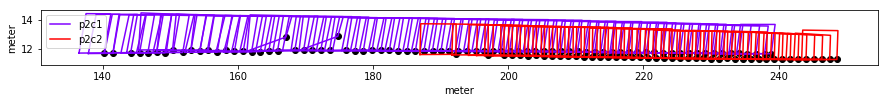

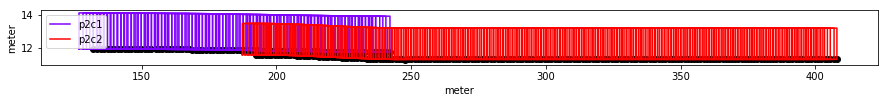

ID: 197261 Valid/total timestamps: 130 / 69 runtime: 2.1162099838256836 
 width: 2.0586551257816246 length: 4.4006260762227445 score: 120.5028327848765
ID: 197261 Valid/total timestamps: 98 / 48 runtime: 3.465252161026001 
 width: 1.8012930586386717 length: 4.328854007032994 score: 2.1815865059541286


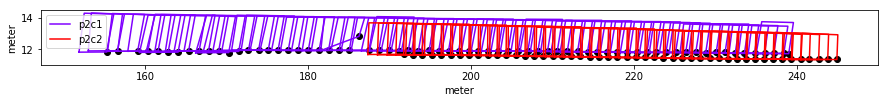

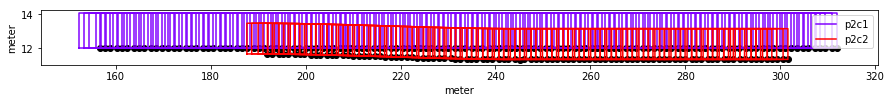

ID: 202261 Valid/total timestamps: 134 / 76 runtime: 4.631003379821777 
 width: 2.113456630442022 length: 3.9201894919564375 score: 9.818923211694035
ID: 202261 Valid/total timestamps: 109 / 49 runtime: 3.783723831176758 
 width: 1.8369800666134248 length: 4.053530820928743 score: 2.743235640606842


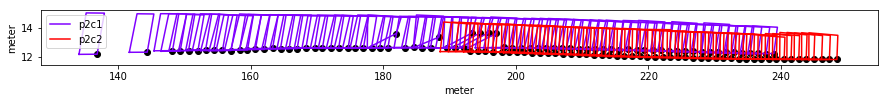

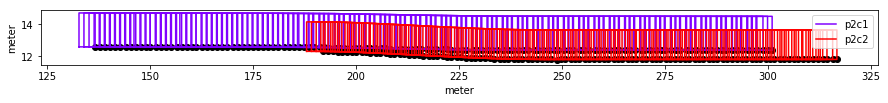

ID: 205261 Valid/total timestamps: 121 / 82 runtime: 4.018068552017212 
 width: 2.3412049250568416 length: 5.43312777664545 score: 9.268552886462146
ID: 205261 Valid/total timestamps: 77 / 57 runtime: 2.4046363830566406 
 width: 1.9813064356926704 length: 5.388362063942816 score: 4.00665818994201


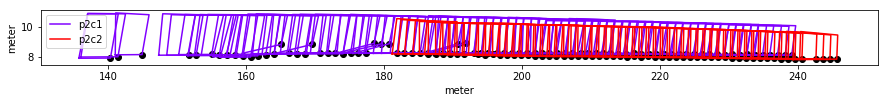

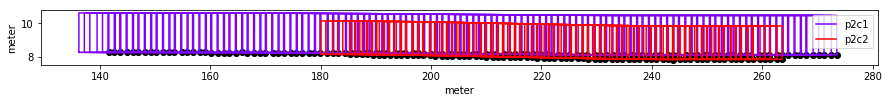

ID: 208261 Valid/total timestamps: 130 / 82 runtime: 4.526857376098633 
 width: 1.8680453421217604 length: 3.173637133325003 score: 10.793256060458111
ID: 208261 Valid/total timestamps: 83 / 47 runtime: 2.7070930004119873 
 width: 1.4917661620337495 length: 3.769997297594137 score: 4.509801152182562


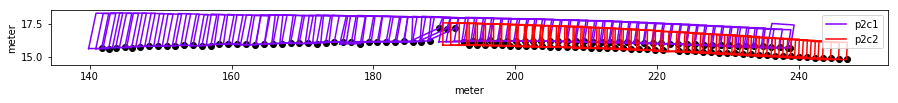

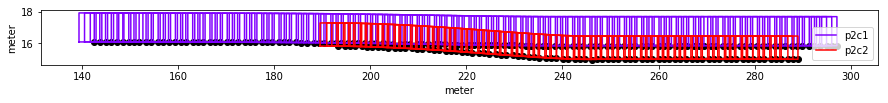

ID: 209261 Valid/total timestamps: 127 / 74 runtime: 1.9719953536987305 
 width: 2.3318394628815216 length: 4.230727645168933 score: 37.42378148931481
ID: 209261 Valid/total timestamps: 112 / 54 runtime: 4.197348117828369 
 width: 2.0024846382409396 length: 4.210805836168362 score: 4.491194090258074


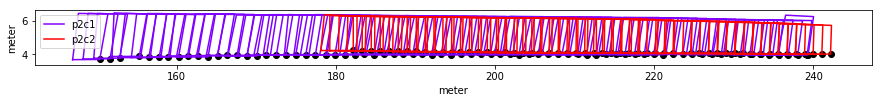

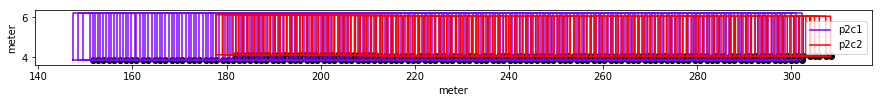

ID: 214261 Valid/total timestamps: 92 / 78 runtime: 4.168300628662109 
 width: 1.9994284130620747 length: 3.321827306721964 score: 16.73691499306506
ID: 214261 Valid/total timestamps: 51 / 49 runtime: 1.3049867153167725 
 width: 1.5579314317838517 length: 3.9264721905124125 score: 2.570226805312333


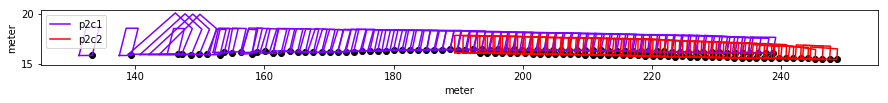

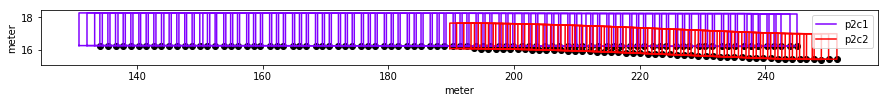

ID: 215261 Valid/total timestamps: 93 / 80 runtime: 3.550370693206787 
 width: 2.2549306573478964 length: 4.768744832571822 score: 9.826009297094817
ID: 215261 Valid/total timestamps: 100 / 50 runtime: 2.9063971042633057 
 width: 2.038612015261192 length: 4.966602080577496 score: 2.978392044371389


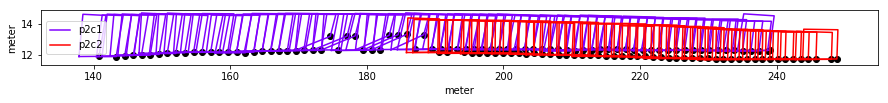

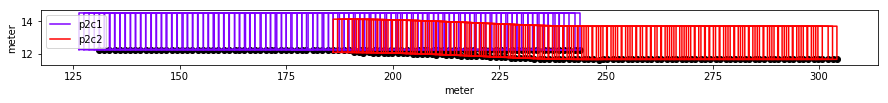

ID: 218261 Valid/total timestamps: 140 / 73 runtime: 1.8938639163970947 
 width: 1.9700041255843297 length: 3.8791148723857893 score: 43.181860786391795
ID: 218261 Valid/total timestamps: 127 / 45 runtime: 4.70311164855957 
 width: 1.628911372175626 length: 4.304517234702748 score: 2.661103067758367


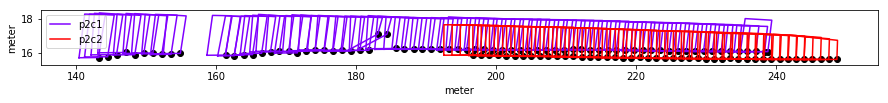

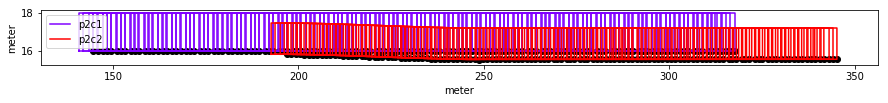

ID: 221221 Valid/total timestamps: 3 / 3 runtime: 0.03505086898803711 
 width: 2.883135190657218 length: 7.330472927247911 score: 2.618379471965027


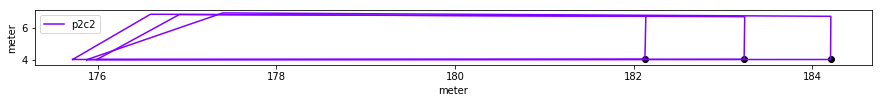

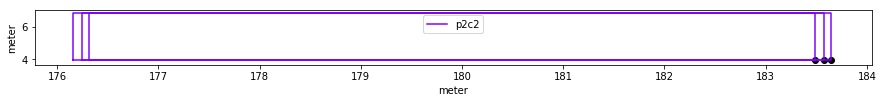

ID: 221261 Valid/total timestamps: 165 / 161 runtime: 5.400411367416382 
 width: 3.482307341020219 length: 23.91405083601025 score: 52.98672024892516
ID: 221261 Valid/total timestamps: 44 / 40 runtime: 2.5007922649383545 
 width: 2.6898440761685 length: 21.997476444876064 score: 7.878672647436854


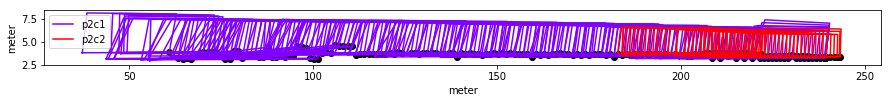

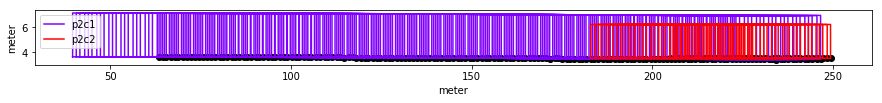

ID: 227261 Valid/total timestamps: 101 / 72 runtime: 3.7246317863464355 
 width: 2.071658973489985 length: 3.72722582775197 score: 7.742363475062802
ID: 227261 Valid/total timestamps: 73 / 51 runtime: 2.149251937866211 
 width: 1.7562678997986396 length: 3.778580509845891 score: 2.2720079935641473


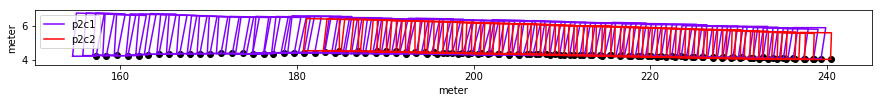

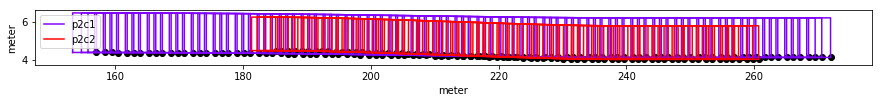

ID: 230261 Valid/total timestamps: 139 / 71 runtime: 4.650046110153198 
 width: 2.0151879005341287 length: 4.424159049192324 score: 7.053297135776248
ID: 230261 Valid/total timestamps: 59 / 42 runtime: 1.6164565086364746 
 width: 1.8000908004031184 length: 4.262687505361193 score: 1.835666642577709


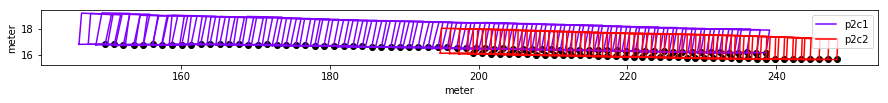

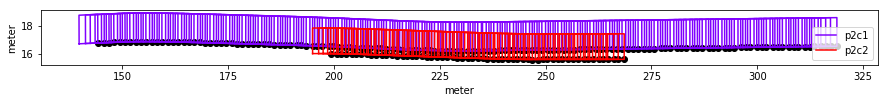

ID: 241261 Valid/total timestamps: 114 / 97 runtime: 4.826310396194458 
 width: 2.141334204474054 length: 3.4739703404226723 score: 9.601775581604832
ID: 241261 Valid/total timestamps: 123 / 59 runtime: 3.6976051330566406 
 width: 1.7054561498093406 length: 3.8739681193575755 score: 2.2016632543716272


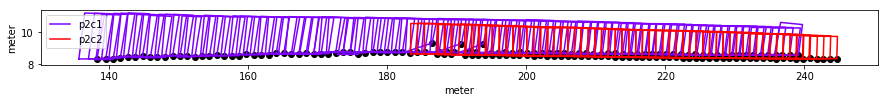

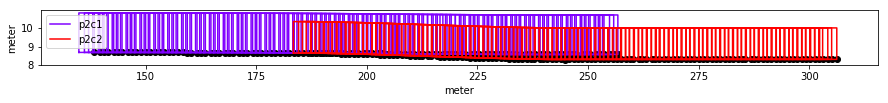

ID: 250261 Valid/total timestamps: 123 / 80 runtime: 1.573380708694458 
 width: 2.2559004766688213 length: 4.89138116292316 score: 38.5352500032825
ID: 250261 Valid/total timestamps: 99 / 58 runtime: 3.289985418319702 
 width: 1.9659652550859112 length: 4.924110840866199 score: 2.382159304299439


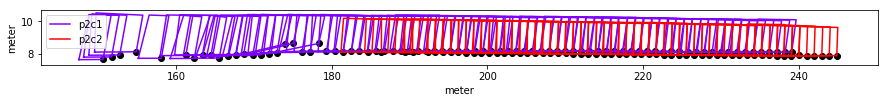

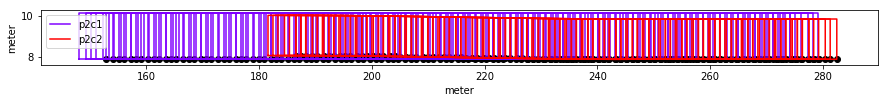

ID: 263221 Valid/total timestamps: 111 / 86 runtime: 3.999060869216919 
 width: 3.541341254237433 length: 22.62763269371104 score: 18.372768525308302
ID: 263221 Valid/total timestamps: 37 / 34 runtime: 0.3034708499908447 
 width: 3.3838196163660896 length: 21.29808281621918 score: 3.939845001600467


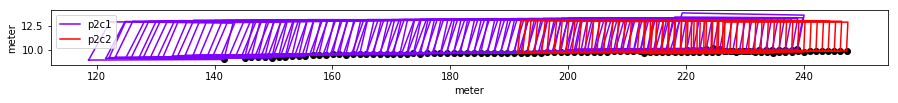

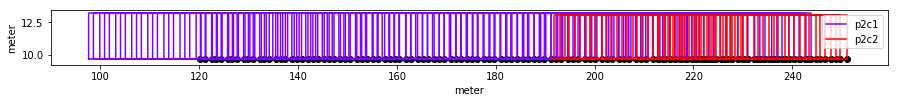

ID: 264221 Valid/total timestamps: 118 / 95 runtime: 4.752193927764893 
 width: 3.6029767078458335 length: 22.98419100511835 score: 55.950326951182134
ID: 264221 Valid/total timestamps: 36 / 35 runtime: 1.0445899963378906 
 width: 2.681522312252397 length: 21.70056938149451 score: 5.979670359375209


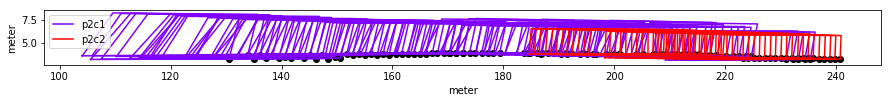

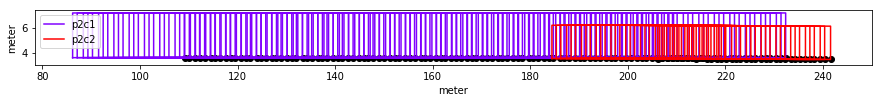

ID: 269221 Valid/total timestamps: 9 / 8 runtime: 0.08613181114196777 
 width: 2.056183630726061 length: 3.472250464159245 score: 0.9839263914850587


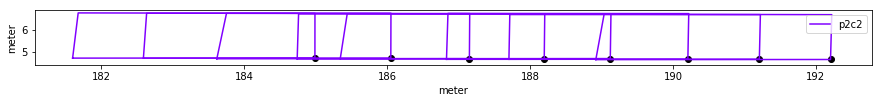

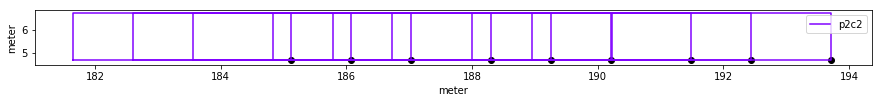

ID: 270211 Valid/total timestamps: 27 / 26 runtime: 0.2113182544708252 
 width: 2.434424494777316 length: 2.681196616747767 score: 5.722306200548129


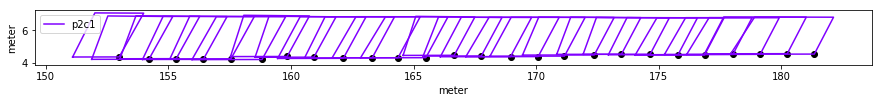

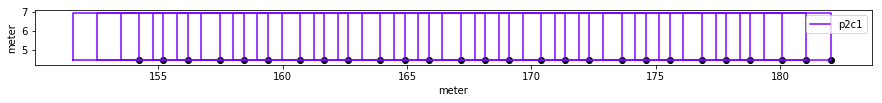

ID: 273211 Valid/total timestamps: 26 / 24 runtime: 0.25038838386535645 
 width: 2.867310521401898 length: 2.848915914743781 score: 6.607778888213501


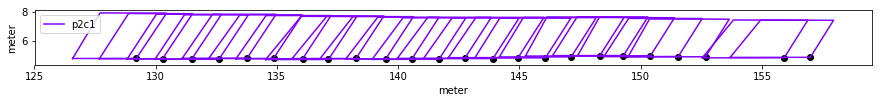

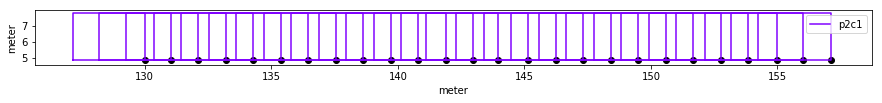

ID: 312261 Valid/total timestamps: 174 / 163 runtime: 5.437221527099609 
 width: 3.311342624199563 length: 21.017066719113835 score: 47.84639799665272
ID: 312261 Valid/total timestamps: 41 / 39 runtime: 2.857330322265625 
 width: 2.7001016569582696 length: 22.470330029109505 score: 3.278106048118736


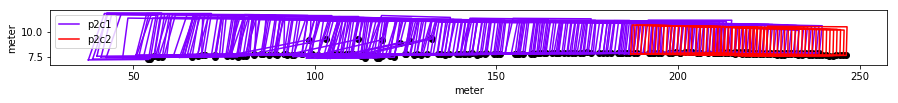

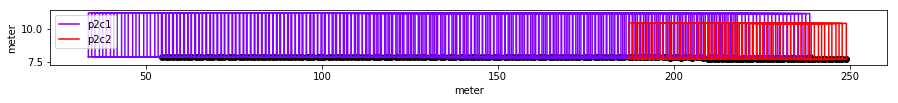

IndexError: index -1 is out of bounds for axis 0 with size 0

In [34]:
import utils_optimization as opt
importlib.reload(opt)
import utils
importlib.reload(utils)
from matplotlib.pyplot import cm
# group by objects

groups = df.groupby('ID')
groupList = list(groups.groups)
nO = len(groupList) # number of cars to test
nc = 2 # number of different colors
print(nO,'unique cars')

# optimization parameters
lam1 = 1 # modification of measurement
lam2 = 1 # acceleration
lam3 = 0 # jerk
lam4 = 10 # theta
lam5 = 1 # omega

# score = np.zeros(nO) # record correction score

for i in range(nO): # for each car object
    ID = groupList[i]
#     ID = 22261
    Y = groups.get_group(ID)
    color=cm.rainbow(np.linspace(0,1,nc))
    camera_group = Y.groupby('camera')
    nC = len(camera_group)
    cgList = list(camera_group.groups)
    Y1list = []
    Yrelist = []

    for cgi in range(nC):
        cameraID = cgList[cgi]
#         cameraID = 'p2c1'
        Y1 = camera_group.get_group(cameraID)
        # impute missing timestamps
        timestamps = Y1['Timestamp'].values
        timestamps= utils.nan_helper(timestamps)
        dt = np.diff(timestamps)
        # get bottom 4 points coordinates
        Y1 = np.array(Y1[['bbr_x','bbr_y', 'fbr_x','fbr_y','fbl_x','fbl_y','bbl_x', 'bbl_y']])
        
        # Euler forward dynamics
        start = time.time()
        N = len(Y1) 
        notNan = ~np.isnan(np.sum(Y1,axis=-1))
        Y1 = Y1[notNan,:]
        Y1list.append(Y1)
        a0 = np.zeros((N))
        theta0 = np.zeros((N))
        v0 = (Y1[-1,0]-Y1[0,0])/(timestamps[notNan][-1]-timestamps[notNan][0])
        x0 = (Y1[0,0]+Y1[0,6])/2
        y0 = (Y1[0,1]+Y1[0,7])/2
        X0 = np.concatenate((a0.T, theta0.T, \
                             [v0,x0,y0,np.nanmean(np.abs(Y1[:,1]-Y1[:,7])),\
                              np.nanmean(np.abs(Y1[:,0]-Y1[:,2]))]),axis=-1)
        bnds = [(-5,5) for i in range(0,N)]+\
            [(-np.pi/8,np.pi/8) for i in range(N)]+\
            [(0,40),(-np.inf,np.inf),(0,np.inf),(1,4),(2,np.inf)]

        # Constraints definition (only for COBYLA, SLSQP and trust-constr)
        res = minimize(opt.obj1, X0, (Y1,N,dt,notNan,lam1,lam2,lam3,lam4,lam5), method = 'L-BFGS-B',
                        bounds=bnds, options={'disp': False,'maxiter':100000})#
        end = time.time()
        # extract results
        Yre, x,y,v,a,theta,omega,w,l = opt.unpack1(res,N,dt)
        Yrelist.append(Yre)
#         print('ID:',ID, 'N:',N, 'runtime:',end - start,'\n width:',w,'length:',l)

        print('ID:',ID, 'Valid/total timestamps:',N, '/',np.count_nonzero(notNan),\
              'runtime:',end - start,'\n width:',w,'length:',l,'score:',LA.norm(Y1-Yre[notNan,:],'fro')/np.count_nonzero(notNan)) 
    
    # plot 
    fig, ax = plt.subplots(figsize=(15,1))
    for cgi in range(nC):
        D = Y1list[cgi]
        cameraID = cgList[cgi]
        c=color[cgi%nc]
        for i in range(len(D)):
            coord = D[i,:]
            coord = np.reshape(coord,(-1,2)).tolist()
            coord.append(coord[0]) #repeat the first point to create a 'closed loop'
            xs, ys = zip(*coord) #lon, lat as x, y
            plt.plot(xs,ys,c=c,label=cameraID if i == 0 else "")
        plt.scatter(D[:,2],D[:,3],color='black')
        ax = plt.gca()
        plt.xlabel('meter')
        plt.ylabel('meter')
        ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
    plt.legend()
    plt.show() 
    
    fig, ax = plt.subplots(figsize=(15,1))
    for cgi in range(nC):
        D = Yrelist[cgi]
        cameraID = cgList[cgi]
        c=color[cgi%nc]
        for i in range(len(D)):
            coord = D[i,:]
            coord = np.reshape(coord,(-1,2)).tolist()
            coord.append(coord[0]) #repeat the first point to create a 'closed loop'
            xs, ys = zip(*coord) #lon, lat as x, y
            plt.plot(xs,ys,c=c,label=cameraID if i == 0 else "")
        plt.scatter(D[:,2],D[:,3],color='black')
        ax = plt.gca()
        plt.xlabel('meter')
        plt.ylabel('meter')
        ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
    plt.legend()
    plt.show() 

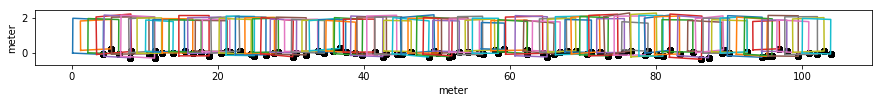

In [5]:
# generate synthetic data

D = Y1

fig, ax = plt.subplots(figsize=(15,1))
for i in range(len(D)):
    coord = D[i,:]
    coord = np.reshape(coord,(-1,2)).tolist()
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    xs, ys = zip(*coord) #lon, lat as x, y
    plt.plot(xs,ys)
    plt.scatter(D[:,2],D[:,3],color='black')
    ax = plt.gca()
    plt.xlabel('meter')
    plt.ylabel('meter')
    ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
        

In [131]:
# Batch optimization
# parameters
lam1 = 1 # modification of measurement
lam2 = 1 # acceleration
lam3 = 0 # jerk
lam4 = 10 # theta
lam5 = 1 # omega
fps = 30
num_secs = np.linspace(1,300,20)
ns = np.zeros(len(num_secs))
times = np.zeros(len(num_secs))
error = np.zeros(len(num_secs))

for sec in range(len(num_secs)):
    num_sec = num_secs[sec]

    n = int(num_sec*fps)
    timestamps, Y1 = opt.create_synth_data(n)

    start = time.time()

    N = len(Y1) 
    notNan = ~np.isnan(np.sum(Y1,axis=-1))
    Y1 = Y1[notNan,:]
    dt = np.diff(timestamps)

    a0 = np.zeros((N))
    theta0 = np.zeros((N))
    v0 = (Y1[-1,0]-Y1[0,0])/(timestamps[notNan][-1]-timestamps[notNan][0])
    x0 = (Y1[0,0]+Y1[0,6])/2
    y0 = (Y1[0,1]+Y1[0,7])/2
    X0 = np.concatenate((a0.T, theta0.T, \
                         [v0,x0,y0,np.nanmean(np.abs(Y1[:,1]-Y1[:,7])),\
                          np.nanmean(np.abs(Y1[:,0]-Y1[:,2]))]),axis=-1)
    bnds = [(-5,5) for ii in range(0,N)]+\
        [(-np.pi/8,np.pi/8) for ii in range(N)]+\
        [(0,40),(-np.inf,np.inf),(0,np.inf),(1,4),(2,np.inf)]

    res = minimize(opt.obj1, X0, (Y1,N,dt,notNan,lam1,lam2,lam3,lam4,lam5), method = 'L-BFGS-B',
                    bounds=bnds, options={'disp': False,'maxiter':100000})#
    end = time.time()
    times[sec] = end-start
    
    # extract results
    Yre, x,y,v,a,theta,omega,w,l = opt.unpack1(res,N,dt)
    error[sec] = LA.norm(Y1-Yre[notNan,:],'fro')/np.count_nonzero(notNan)
    print('number of seconds',num_sec,'Valid timestamps:',N,\
          'runtime:',end - start,'\n width:',w,'length:',l,'score:',LA.norm(Y1-Yre[notNan,:],'fro')/np.count_nonzero(notNan)) 

    D = Y1
    fig, ax = plt.subplots(figsize=(15,1))
    for i in range(len(D)):
        coord = D[i,:]
        coord = np.reshape(coord,(-1,2)).tolist()
        coord.append(coord[0]) #repeat the first point to create a 'closed loop'
        xs, ys = zip(*coord) #lon, lat as x, y
        plt.plot(xs,ys)
        plt.scatter(D[:,2],D[:,3],color='black')
        ax = plt.gca()
        plt.xlabel('meter')
        plt.ylabel('meter')
        ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
    plt.show()
        
    D = Yre
    fig, ax = plt.subplots(figsize=(15,1))
    for i in range(len(D)):
        coord = D[i,:]
        coord = np.reshape(coord,(-1,2)).tolist()
        coord.append(coord[0]) #repeat the first point to create a 'closed loop'
        xs, ys = zip(*coord) #lon, lat as x, y
        plt.plot(xs,ys)
        plt.scatter(D[:,2],D[:,3],color='black')
        ax = plt.gca()
        plt.xlabel('meter')
        plt.ylabel('meter')
        ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
    plt.show()

numer of seconds 1.0 Valid timestamps: 30 runtime: 0.24336767196655273 
 width: 2.0118810332091286 length: 3.984589713358654 score: 12.75686687947747
numer of seconds 16.736842105263158 Valid timestamps: 502 runtime: 20.001253843307495 
 width: 1.9845208901359461 length: 4.011329865761418 score: 0.028551524937819615
numer of seconds 32.473684210526315 Valid timestamps: 974 runtime: 33.066850662231445 
 width: 1.9972692571504713 length: 4.011863748189286 score: 0.021604405940353875
numer of seconds 48.21052631578947 Valid timestamps: 1446 runtime: 58.83796763420105 
 width: 2.0103201572072695 length: 4.012956708421136 score: 0.017648247512854893
numer of seconds 63.94736842105263 Valid timestamps: 1918 runtime: 57.646167278289795 
 width: 2.001862448730936 length: 4.0071704219154665 score: 0.014826795214996228
numer of seconds 79.68421052631578 Valid timestamps: 2390 runtime: 88.23941826820374 
 width: 2.0018981316905498 length: 3.998327554124369 score: 0.013199587660039747
numer of sec

In [142]:
# get a sense of runtime vs. #frames total
import utils_optimization as opt
importlib.reload(opt)
import utils
importlib.reload(utils)

# try a receding horizon approach
PH = 200 # optimize over Prediction Horizon frames
IH = 100 # implementation horizon

fps = 30
num_secs = np.linspace(1,300,20)
times_200 = np.zeros(len(num_secs))
error_200 = np.zeros(len(num_secs))

for sec in range(len(num_secs)):
    num_sec = num_secs[sec]
    # generate synthetic data
    n = int(num_sec*fps) # frames
    print(n)
    if (n<IH):
        times_100[sec] = 0
        error_100[sec] = 0
        continue
    timestamps, Y = opt.create_synth_data(n)
    notNan = ~np.isnan(np.sum(Y,axis=-1))

    w,l = opt.estimate_dimensions(Y[:100,:],timestamps[:100],lam1,lam2,lam3,lam4,lam5) # use some data to estimate vehicle dimensions
    print('estimated w:',w,'l:',l)

    start = time.time()
    Yre = opt.receding_horizon_opt(Y,timestamps,w,l,n,lam1,lam2,lam3,lam4,lam5,PH,IH)
    end = time.time()
    times_200[sec] = end-start
    error_200[sec] = LA.norm(Y-Yre[notNan,:],'fro')/np.count_nonzero(notNan)
    print('time: ',times_200[sec],'error: ',error_200[sec])


30
502
estimated w: 1.998513212685446 l: 3.961215098851152
time:  9.371170043945312 error:  0.030917113236006624
974
estimated w: 2.0044665533127897 l: 3.9691512485512295
time:  19.342235326766968 error:  0.022269822404459322
1446
estimated w: 1.999101087196299 l: 3.992403622046191
time:  27.83709192276001 error:  0.017594596469392893
1918
estimated w: 1.9956281453811122 l: 4.018317052933087
time:  38.91985058784485 error:  0.015269792160901534
2390
estimated w: 2.001102993985751 l: 3.9795681120218704
time:  46.79075217247009 error:  0.013686046338037642
2862
estimated w: 2.014407703068054 l: 4.0475153169625555
time:  57.36873245239258 error:  0.01220661630240655
3334
estimated w: 2.024100282700977 l: 3.9462329132329406
time:  66.97627449035645 error:  0.011450558436908335
3806
estimated w: 2.0186203447417093 l: 4.0114144696839835
time:  75.59730505943298 error:  0.010662129480374812
4278
estimated w: 2.023154281197527 l: 3.9573287584302723
time:  85.68555068969727 error:  0.0100673340

Text(0.5,1,'error')

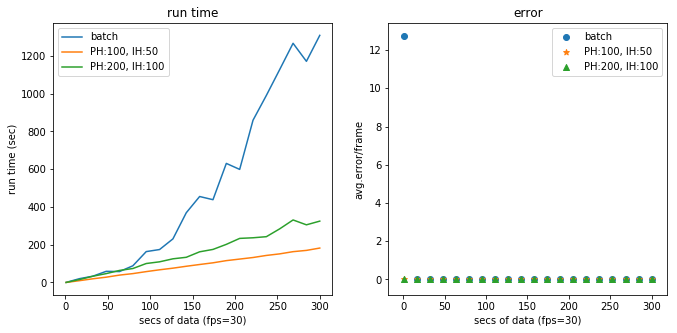

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))

ax1.plot(num_secs,times,label='batch')
ax1.plot(num_secs,times_100,label = 'PH:100, IH:50')
ax1.plot(num_secs,times_200,label = 'PH:200, IH:100')
ax1.legend()
ax1.set_xlabel('secs of data (fps=30)')
ax1.set_ylabel('run time (sec)')
ax1.set_title('run time')

ax2.scatter(num_secs,error,label='batch')
ax2.scatter(num_secs,error_100,marker='*',label = 'PH:100, IH:50')
ax2.scatter(num_secs,error_200,marker='^',label = 'PH:200, IH:100')
ax2.legend()
ax2.set_xlabel('secs of data (fps=30)')
ax2.set_ylabel('avg.error/frame')
ax2.set_title('error')

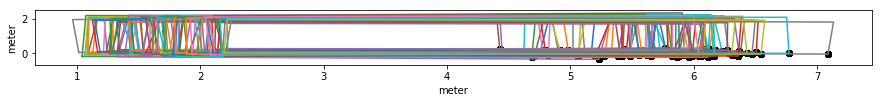

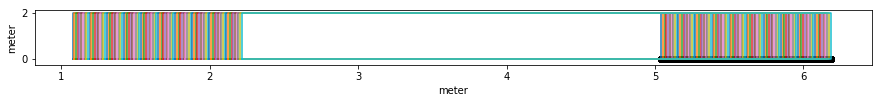

In [145]:
D = Y1[100:200,:]
fig, ax = plt.subplots(figsize=(15,1))
for i in range(len(D)):
    coord = D[i,:]
    coord = np.reshape(coord,(-1,2)).tolist()
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    xs, ys = zip(*coord) #lon, lat as x, y
    plt.plot(xs,ys)
    plt.scatter(D[:,2],D[:,3],color='black')
    ax = plt.gca()
    plt.xlabel('meter')
    plt.ylabel('meter')
    ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
plt.show()
D = Yre[100:200,:]
fig, ax = plt.subplots(figsize=(15,1))
for i in range(len(D)):
    coord = D[i,:]
    coord = np.reshape(coord,(-1,2)).tolist()
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    xs, ys = zip(*coord) #lon, lat as x, y
    plt.plot(xs,ys)
    plt.scatter(D[:,2],D[:,3],color='black')
    ax = plt.gca()
    plt.xlabel('meter')
    plt.ylabel('meter')
    ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
plt.show()

In [48]:
# check consistency of acceleration/theta for minibatches on synthetic data

import utils_optimization as opt
importlib.reload(opt)
import utils
importlib.reload(utils)

# receding horizon approach
PH = 100 # optimize over Prediction Horizon frames
IH = 50 # implementation horizon
fps = 30
num_sec = 20

# generate synthetic data
n = int(num_sec*fps) # frames

timestamps, Y = opt.create_synth_data(n)
notNan = ~np.isnan(np.sum(Y,axis=-1))

w,l = opt.estimate_dimensions(Y[:100,:],timestamps[:100]) # use some data to estimate vehicle dimensions
print('estimated w:',w,'l:',l)

start = time.time()
Yre,a_arr,x_arr,v_arr,theta_arr = opt.receding_horizon_opt(Y,timestamps,w,l,n,PH,IH)
end = time.time()

print('run time: ',end-start,'correction/frame: ',LA.norm(Y-Yre[notNan,:],'fro')/np.count_nonzero(notNan))


estimated w: 1.9705144884495036 l: 4.010601123440583
0 / 600
50 / 600
100 / 600
150 / 600
200 / 600
250 / 600
300 / 600
350 / 600
400 / 600
450 / 600
500 / 600
run time:  19.61164689064026 correction/frame:  0.026481489367053863


(600,)

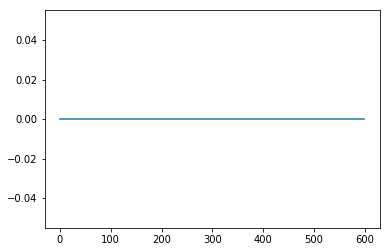

In [50]:
from matplotlib import cm
color=cm.rainbow(np.linspace(0,1,n))

for each car i
    plt.plot(xxx, color = color[i%n])
